# IRIS Sample Data 불러오기 

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()


,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-Means 군집 분석 & Prediction

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

#K-Means 군집 분석 
model = KMeans(n_clusters=4,algorithm='auto')
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# predict 추가 
r = pd.concat([feature,predict],axis=1)

print(r)


     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4        0
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1     

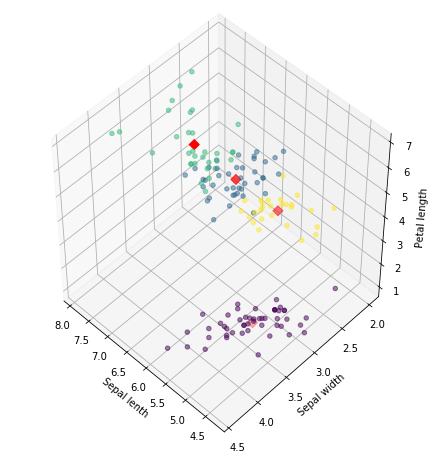

In [17]:
# 각 군집의 중심점 
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width','Petal length','Petal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
center_z = centers['Petal length']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [18]:
#각 군집별 갯수 확인 
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2   3
labels                 
0        50   0   0   0
1         0  24   0  26
2         0  17  32   1


# 최적의 군집 수 k 결정(elbow point 기법 이용)

Text(0.5,1,'Elbow curve')

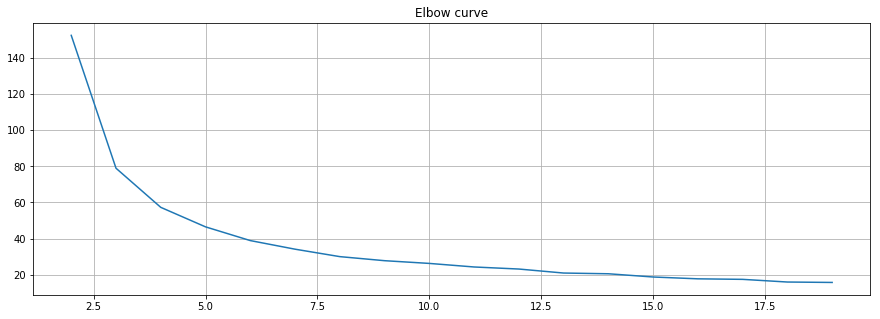

In [14]:
X = feature
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# 데이터 표준화 

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#데이터 표준화하여 k-means 군집분석 
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# predict값 추가 
r = pd.concat([feature,predict],axis=1)

# 교차분석 결과 
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)


predict   0   1   2
labels             
0        50   0   0
1         0  38  12
2         0  14  36
